# Esercizio di Fine Modulo - Python D4


Analisi diffusione COVID-19 nel mondo

Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce Download our complete COVID-19 dataset" scaricare il dataset in formato CSV oppure in formato JSON.

1. Si richiede di verificare le dimensioni del dataset e le diciture presenti nell'intestazione.

2. Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente.

3. Sempre riguardo i casi di COVID totali, si chiede di sviluppare una funzione che prenda in input il dataset e due nomi di continenti, e che ne confronti i seguenti relativi descrittori statistici: valori minimo e massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (in questo caso calcolati anche sulle locazioni senza indicazione di continente).

4. Si chiede poi di effettuare lo stesso tipo di analisi – anche in questo caso sviluppando una funzione ad hoc - per il numero di vaccinazioni totali per ogni continente.

5. Alla fine, basandosi sui calcoli fatti, il committente chiede di stilare un breve (tre o quattro righe) paragrafo testuale riassuntivo sulle statistiche di casi e vaccinazioni, che si concentri solo sulle differenze esistenti tra Europa, Sud America e Oceania.
Per effettuare le analisi si potranno usare, a scelta, strumenti come funzioni e strutture dati built-in quali open (), liste, dizionari; moduli built-in quali csv o json; moduli esterni quali Pandas e i relativi metodi e tipi di dato.

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pit
import numpy as np # linear algebra

import io
import requests

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')



In [88]:
df= pd.read_csv(r"C:\Users\DELL\Desktop\D4 -fINE MODULO\COVID\Covid-19-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343405,ZWE,Africa,Zimbabwe,2023-09-17,265748.00,0.00,0.86,5718.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
343406,ZWE,Africa,Zimbabwe,2023-09-18,265748.00,0.00,0.86,5718.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
343407,ZWE,Africa,Zimbabwe,2023-09-19,265748.00,0.00,0.86,5718.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
343408,ZWE,Africa,Zimbabwe,2023-09-20,265748.00,0.00,0.86,5718.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN


In [89]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [90]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343405,ZWE,Africa,Zimbabwe,2023-09-17,265748.00,0.00,0.86,5718.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
343406,ZWE,Africa,Zimbabwe,2023-09-18,265748.00,0.00,0.86,5718.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
343407,ZWE,Africa,Zimbabwe,2023-09-19,265748.00,0.00,0.86,5718.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
343408,ZWE,Africa,Zimbabwe,2023-09-20,265748.00,0.00,0.86,5718.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN


In [91]:
df.info

<bound method DataFrame.info of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN       0.00   
1           AFG      Asia  Afghanistan  2020-01-04          NaN       0.00   
2           AFG      Asia  Afghanistan  2020-01-05          NaN       0.00   
3           AFG      Asia  Afghanistan  2020-01-06          NaN       0.00   
4           AFG      Asia  Afghanistan  2020-01-07          NaN       0.00   
...         ...       ...          ...         ...          ...        ...   
343405      ZWE    Africa     Zimbabwe  2023-09-17    265748.00       0.00   
343406      ZWE    Africa     Zimbabwe  2023-09-18    265748.00       0.00   
343407      ZWE    Africa     Zimbabwe  2023-09-19    265748.00       0.00   
343408      ZWE    Africa     Zimbabwe  2023-09-20    265748.00       0.00   
343409      ZWE    Africa     Zimbabwe  2023-09-21    265748.00       0.00   

        new_cases_smoothed  tot

In [92]:
df.columns # Per ottenere i metadati delle colonne 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [93]:
df.index # per ottenere i metadati delle righe 


RangeIndex(start=0, stop=343410, step=1)

In [94]:
records,attributes = df.shape
print(f"Il Dataframe è costituito da {records} records e {attributes} attributi")

Il Dataframe è costituito da 343410 records e 67 attributi


In [95]:
# Analisi kpi quantitative 
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,305500.00,333872.00,332613.00,284073.00,333905.00,332675.00,305500.00,333872.00,332613.00,284073.00,...,197000.00,130388.00,235026.00,315891.00,258063.00,343410.00,11944.00,11944.00,11944.00,11944.00
mean,6538519.61,9781.78,9818.62,85195.33,87.68,88.00,99575.88,147.83,148.39,862.66,...,32.91,50.79,3.10,73.72,0.72,128490685.35,51133.97,9.74,11.46,1644.92
std,39976936.00,111350.17,95398.64,436332.55,637.43,567.34,149355.35,1174.92,605.54,1093.48,...,13.57,31.96,2.55,7.40,0.15,660878645.34,144322.76,12.38,25.36,1927.69
min,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.70,1.19,0.10,53.28,0.39,47.00,-37726.10,-44.23,-95.92,-2752.92
25%,7821.00,0.00,0.29,125.00,0.00,0.00,2525.19,0.00,0.06,58.88,...,22.60,20.86,1.30,69.59,0.60,449002.00,106.40,1.31,-1.63,64.91
50%,68536.50,2.00,26.14,1298.00,0.00,0.14,27060.90,0.19,6.97,371.72,...,33.10,49.84,2.50,75.05,0.74,5882259.00,5732.80,8.06,5.77,1071.51
75%,720148.25,279.00,517.43,11691.00,3.00,5.43,128872.51,37.40,85.43,1342.30,...,41.30,82.50,4.20,79.46,0.83,28301700.00,36669.95,15.47,16.52,2701.61
max,770777632.00,8401961.00,6402036.29,6958486.00,43677.00,14822.00,737554.51,228872.02,37241.78,6510.33,...,78.10,100.00,13.80,86.75,0.96,7975105024.00,1289776.50,76.55,377.63,10292.92


In [96]:
df.isnull().sum()


iso_code                                        0
continent                                   16350
location                                        0
date                                            0
total_cases                                 37910
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       331466
excess_mortality_cumulative                331466
excess_mortality                           331466
excess_mortality_cumulative_per_million    331466
Length: 67, dtype: int64

In [97]:
df.nunique() # valori unici


iso_code                                      255
continent                                       6
location                                      255
date                                         1366
total_cases                                134243
                                            ...  
population                                    255
excess_mortality_cumulative_absolute        11753
excess_mortality_cumulative                  4137
excess_mortality                             5273
excess_mortality_cumulative_per_million     11890
Length: 67, dtype: int64

In [98]:
df.corr()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.00,0.37,0.44,0.94,0.30,0.34,0.07,0.00,0.00,0.10,...,0.00,0.03,0.02,0.02,0.05,0.65,0.74,0.06,-0.04,0.17
new_cases,0.37,1.00,0.84,0.43,0.49,0.43,0.00,0.09,0.07,0.02,...,0.01,0.02,0.01,0.02,0.03,0.37,0.13,-0.01,0.01,-0.00
new_cases_smoothed,0.44,0.84,1.00,0.50,0.46,0.51,0.00,0.04,0.08,0.03,...,0.01,0.02,0.02,0.02,0.03,0.44,0.37,0.04,0.08,0.03
total_deaths,0.94,0.43,0.50,1.00,0.45,0.52,0.02,-0.00,-0.00,0.11,...,-0.00,0.04,-0.00,0.01,0.04,0.74,0.93,0.24,-0.00,0.27
new_deaths,0.30,0.49,0.46,0.45,1.00,0.89,-0.04,0.03,0.02,0.00,...,0.00,0.03,-0.00,0.01,0.04,0.57,0.25,0.08,0.19,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
population,0.65,0.37,0.44,0.74,0.57,0.64,-0.07,-0.01,-0.02,-0.06,...,0.01,0.04,-0.02,-0.02,0.00,1.00,0.77,0.16,0.05,0.10
excess_mortality_cumulative_absolute,0.74,0.13,0.37,0.93,0.25,0.45,0.01,-0.04,-0.03,0.27,...,-0.08,-0.02,-0.12,-0.19,-0.10,0.77,1.00,0.32,0.03,0.36
excess_mortality_cumulative,0.06,-0.01,0.04,0.24,0.08,0.19,0.02,-0.03,0.00,0.46,...,-0.01,0.02,-0.23,-0.30,-0.43,0.16,0.32,1.00,0.38,0.64
excess_mortality,-0.04,0.01,0.08,-0.00,0.19,0.28,-0.14,0.04,0.16,-0.05,...,0.04,-0.03,-0.09,-0.14,-0.22,0.05,0.03,0.38,1.00,0.07


In [99]:
df2=df.groupby("continent")[["total_cases","new_cases","total_deaths","new_deaths","tests_per_case","total_vaccinations","population"]].mean().sort_values(by="new_cases",ascending= False)

<Axes: xlabel='continent'>

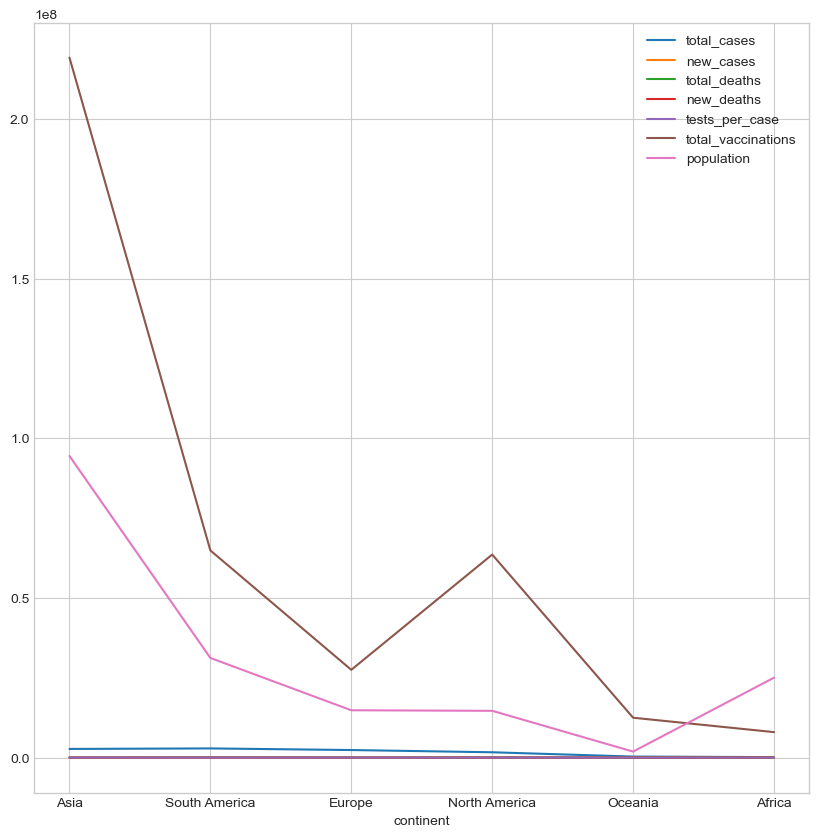

In [100]:
df2.plot(figsize=(10,10))

In [101]:
continent_list_n = list(set(df["continent"]))
continent_list = []
for i in continent_list_n:
    if str(i) != "nan":
        continent_list.append(str(i))
continent_list

['North America', 'Oceania', 'Asia', 'South America', 'Africa', 'Europe']

In [102]:
df.groupby("continent").mean()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
continent,,,,,,,,,,,,,,,,,,,,,
Africa,145052.99,169.38,170.01,3254.02,3.36,3.37,23410.01,34.22,34.35,215.13,...,27.42,25.16,1.51,64.96,0.56,25020045.77,55819.82,11.09,12.49,1233.65
Asia,2707763.24,4711.76,4730.58,23315.71,26.28,26.37,73025.58,105.38,105.80,467.62,...,39.70,72.27,3.23,74.53,0.74,94444224.56,31465.21,10.60,13.68,1029.07
Europe,2362835.27,3600.50,3613.64,26690.59,29.99,30.10,194541.99,292.81,293.89,1685.35,...,35.60,93.95,5.17,79.78,0.88,14819203.89,32931.76,7.74,9.16,1898.38
North America,1664838.27,2240.79,2249.29,28295.50,28.91,29.00,113073.32,170.84,171.48,959.56,...,22.31,77.54,2.32,77.21,0.76,14644527.77,134129.36,10.21,13.02,1530.89
Oceania,317859.81,443.81,445.45,868.24,0.91,0.91,118622.44,171.47,172.10,511.69,...,35.28,47.87,3.02,73.66,0.71,1876621.12,1966.99,-0.77,3.74,20.83
South America,2868509.08,3621.27,3633.63,73519.97,71.54,71.80,96335.51,134.91,135.42,1736.18,...,24.66,65.99,2.07,75.89,0.76,31197995.39,73814.96,22.96,22.09,2074.86


In [103]:
df.groupby(["continent"])["new_cases"].sum()

continent
Africa           13108913.00
Asia            300596432.00
Europe          249345148.00
North America   124457848.00
Oceania          14462523.00
South America    68822325.00
Name: new_cases, dtype: float64

In [104]:
filtro1 = df.loc[:, "continent"]=="Europe"
output= df.loc[filtro1, "new_cases"]
print("Il numero di casi in Europa sono: ", output.sum())

Il numero di casi in Europa sono:  249345148.0


In [105]:
filtro2 = df.loc[:, "continent"]=="North America"
output= df.loc[filtro2, "new_cases"]
print("Il numero di casi in North America sono: ", output.sum())

Il numero di casi in North America sono:  124457848.0


In [106]:
# Confronto dei dati statistici di tutti i continenti 

In [107]:
print("| CONFRONTO DATI COVID-19 PER CONTINENTE |")
def inf_conf(df, cnt1, cnt2, cnt3, cnt4, cnt5, cnt6):
    cnd_1=df.loc[:, 'continent'] == cnt1
    cnd_2=df.loc[:, 'continent'] == cnt2
    cnd_3=df.loc[:, 'continent'] == cnt3
    cnd_4=df.loc[:, 'continent'] == cnt4
    cnd_5=df.loc[:, 'continent'] == cnt5
    cnd_6=df.loc[:, 'continent'] == cnt6
    
    casicovidtot1=df.loc[cnd_1, 'total_cases']
    casicovidtot2=df.loc[cnd_2, 'total_cases']
    casicovidtot3=df.loc[cnd_3, 'total_cases']
    casicovidtot4=df.loc[cnd_4, 'total_cases']
    casicovidtot5=df.loc[cnd_5, 'total_cases']
    casicovidtot6=df.loc[cnd_6, 'total_cases']
    
    mincov1=casicovidtot1.min()
    mincov2=casicovidtot2.min()
    mincov3=casicovidtot3.min()
    mincov4=casicovidtot4.min()
    mincov5=casicovidtot5.min()
    mincov6=casicovidtot6.min()
    
    casicovidnw1=df.loc[cnd_1, 'new_cases']
    casicovidnw2=df.loc[cnd_2, 'new_cases']
    casicovidnw3=df.loc[cnd_3, 'new_cases']
    casicovidnw4=df.loc[cnd_4, 'new_cases']
    casicovidnw5=df.loc[cnd_5, 'new_cases']
    casicovidnw6=df.loc[cnd_6, 'new_cases']
    
    maxcov1=casicovidnw1.max()
    maxcov2=casicovidnw2.max()
    maxcov3=casicovidnw3.max()
    maxcov4=casicovidnw4.max()
    maxcov5=casicovidnw5.max()
    maxcov6=casicovidnw6.max()
    
    mediacov1=round(casicovidnw1.mean(),2)
    mediacov2=round(casicovidnw2.mean(),2)
    mediacov3=round(casicovidnw3.mean(),2)
    mediacov4=round(casicovidnw4.mean(),2)
    mediacov5=round(casicovidnw5.mean(),2)
    mediacov6=round(casicovidnw6.mean(),2)
    
    tc=df.groupby('continent')
        
    percentot1=round(casicovidnw1.sum()*100/tc['new_cases'].sum().sum(),2)
    percentot2=round(casicovidnw2.sum()*100/tc['new_cases'].sum().sum(),2)
    percentot3=round(casicovidnw3.sum()*100/tc['new_cases'].sum().sum(),2)
    percentot4=round(casicovidnw4.sum()*100/tc['new_cases'].sum().sum(),2)
    percentot5=round(casicovidnw5.sum()*100/tc['new_cases'].sum().sum(),2)
    percentot6=round(casicovidnw6.sum()*100/tc['new_cases'].sum().sum(),2)
    
    ccov={"CONTINENTE":[cnt1, cnt2, cnt3, cnt4, cnt5, cnt6], "MINIMO":[mincov1, mincov2, mincov3, mincov4, mincov5, mincov6], "MASSIMO":[maxcov1, maxcov2, maxcov3, maxcov4, maxcov5, maxcov6], 
          "MEDIA CASI":[mediacov1, mediacov2, mediacov3, mediacov4, mediacov5, mediacov6], "% INFEZIONI":[percentot1, percentot2, percentot3, percentot4, percentot5, percentot6]}
    
    return pd.DataFrame(ccov)

inf_conf(df, "Africa", "Asia", "Europe", "North America", "Oceania", "South America")

| CONFRONTO DATI COVID-19 PER CONTINENTE |


,CONTINENTE,MINIMO,MASSIMO,MEDIA CASI,% INFEZIONI
0,Africa,1.00,46914.00,169.38,1.70
1,Asia,1.00,6966046.00,4711.76,39.00
2,Europe,1.00,2417043.00,3600.50,32.35
3,North America,1.00,1265520.00,2240.79,16.15
4,Oceania,1.00,588813.00,443.81,1.88
5,South America,1.00,298408.00,3621.27,8.93


In [108]:
print("| STATISTICHE VACCINAZIONI COVID-19 PER CONTINENTE |")
def vac_cov (covid19_data, cnt1, cnt2, cnt3, cnt4, cnt5, cnt6):
    cnd_1=df.loc[:, 'continent'] == cnt1
    cnd_2=df.loc[:, 'continent'] == cnt2
    cnd_3=df.loc[:, 'continent'] == cnt3
    cnd_4=df.loc[:, 'continent'] == cnt4
    cnd_5=df.loc[:, 'continent'] == cnt5
    cnd_6=df.loc[:, 'continent'] == cnt6
    
    vacovidtot1=df.loc[cnd_1, 'new_vaccinations']
    vacovidtot2=df.loc[cnd_2, 'new_vaccinations']
    vacovidtot3=df.loc[cnd_3, 'new_vaccinations']
    vacovidtot4=df.loc[cnd_4, 'new_vaccinations']
    vacovidtot5=df.loc[cnd_5, 'new_vaccinations']
    vacovidtot6=df.loc[cnd_6, 'new_vaccinations']
    
    minvac1=vacovidtot1.min()
    minvac2=vacovidtot2.min()
    minvac3=vacovidtot3.min()
    minvac4=vacovidtot4.min()
    minvac5=vacovidtot5.min()
    minvac6=vacovidtot6.min()
    
    vacovidnw1=df.loc[cnd_1, 'new_vaccinations']
    vacovidnw2=df.loc[cnd_2, 'new_vaccinations']
    vacovidnw3=df.loc[cnd_3, 'new_vaccinations']
    vacovidnw4=df.loc[cnd_4, 'new_vaccinations']
    vacovidnw5=df.loc[cnd_5, 'new_vaccinations']
    vacovidnw6=df.loc[cnd_6, 'new_vaccinations']
    
    maxvac1=vacovidnw1.max()
    maxvac2=vacovidnw2.max()
    maxvac3=vacovidnw3.max()
    maxvac4=vacovidnw4.max()
    maxvac5=vacovidnw5.max()
    maxvac6=vacovidnw6.max()
    
    mediavac1=round(vacovidnw1.mean(),2)
    mediavac2=round(vacovidnw2.mean(),2)
    mediavac3=round(vacovidnw3.mean(),2)
    mediavac4=round(vacovidnw4.mean(),2)
    mediavac5=round(vacovidnw5.mean(),2)
    mediavac6=round(vacovidnw6.mean(),2)
    
    tc=df.groupby('continent')
    
    percentotvac1=round(vacovidnw1.sum()*100/tc['new_vaccinations'].sum().sum(),2)
    percentotvac2=round(vacovidnw2.sum()*100/tc['new_vaccinations'].sum().sum(),2)
    percentotvac3=round(vacovidnw3.sum()*100/tc['new_vaccinations'].sum().sum(),2)
    percentotvac4=round(vacovidnw4.sum()*100/tc['new_vaccinations'].sum().sum(),2)
    percentotvac5=round(vacovidnw5.sum()*100/tc['new_vaccinations'].sum().sum(),2)
    percentotvac6=round(vacovidnw6.sum()*100/tc['new_vaccinations'].sum().sum(),2)
    
    vacov={"CONTINENTE":[cnt1, cnt2, cnt3, cnt4, cnt5, cnt6], "MINIMO":[minvac1, minvac2, minvac3, minvac4, minvac5, minvac6], "MASSIMO":[maxvac1, maxvac2, maxvac3, maxvac4, maxvac5, maxvac6], 
          "MEDIA VACCINAZIONI":[mediavac1, mediavac2, mediavac3, mediavac4, mediavac5, mediavac6], "% VACCINAZIONI":[percentotvac1, percentotvac2, percentotvac3, percentotvac4, percentotvac5, percentotvac6]}
    
    return pd.DataFrame(vacov)

vac_cov(df, "Africa", "Asia", "Europe", "North America", "Oceania", "South America")

| STATISTICHE VACCINAZIONI COVID-19 PER CONTINENTE |


,CONTINENTE,MINIMO,MASSIMO,MEDIA VACCINAZIONI,% VACCINAZIONI
0,Africa,0.00,1866822.00,42203.19,1.08
1,Asia,0.00,24741000.00,495032.17,69.58
2,Europe,0.00,2389472.00,57430.71,11.66
3,North America,0.00,7246123.00,171647.40,9.20
4,Oceania,1.00,351226.00,56859.01,0.69
5,South America,1.00,3976605.00,146805.09,7.79


# 5. REPORT FINALE